# Data Analysis & Hypothesis Testing - Week 1

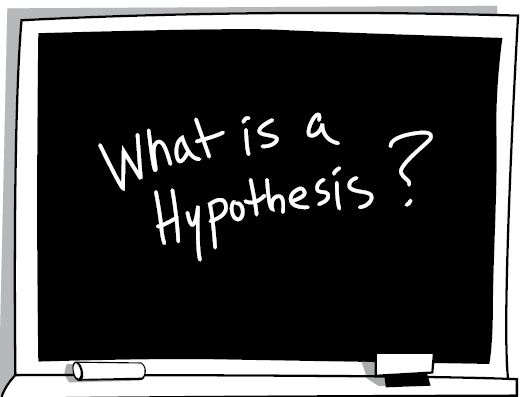

## What is Hypothesis Testing?

##### Hypothesis testing is a fundamental statistical method used to draw conclusions about a population based on a sample. It essentially involves:

Formulating a Hypothesis: You propose a claim you want to test about a population parameter (e.g., the average height is greater than 180cm). This claim forms your hypothesis.

There are two crucial concepts in hypothesis testing, so let's dive into them now:

###### Null Hypothesis (H₀):

This represents the "default" or "no effect" scenario. It assumes there is no difference between the groups or variables you're comparing.
It acts as a baseline against which you test your actual claim.
It's typically denoted as H₀.


###### Alternative Hypothesis (H₁):

This specifies your actual research question or prediction. It proposes the effect or difference you expect to see.
It's the opposite of the null hypothesis and what you hope to find evidence for.
It's commonly denoted as H₁.

Here's an example to illustrate:

###### Scenario: You want to know if a new fertilizer increases plant growth compared to a standard fertilizer.

###### H₀ (Null Hypothesis): There is no difference in average plant growth between the two fertilizers.
H₁ (Alternative Hypothesis): The new fertilizer leads to higher average plant growth than the standard fertilizer.
The testing process essentially revolves around trying to reject the null hypothesis. If you gather enough evidence (through the statistical test and p-value analysis), you can reject the null hypothesis and conclude that your alternative hypothesis is likely true.

Remember:

Both hypotheses are needed for a complete hypothesis test.
The null hypothesis is assumed to be true initially, and the test aims to find evidence to reject it.
The wording of each hypothesis depends on your specific research question and variables.

## Performing a simple hypothesis test on a dataset in a Jupyter Notebook involves several steps, including 
* ### loading the dataset 
* ### formulating a hypothesis, 
* ### selecting an appropriate statistical test, 
* ### conducting the test, 
* ### and interpreting the results. 
### Below, I'll outline these steps using a sample dataset and Python code in a Jupyter Notebook:

## 1. Import Necessary Libraries
##### First, you'll need to import the libraries required for 
* data manipulation, 
* visualization, 
* and statistical testing. 
Commonly used libraries include pandas, numpy, and scipy.stats.

In [7]:
import pandas as pd
import numpy as np
from scipy import stats

## 2. Load the Dataset
##### Load your sample dataset into a pandas DataFrame. For demonstration purposes, let's say:

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to test if assigning an account manager has any influence on the likelihood of customer churn(stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. 

###### N.B sample dataset is from Kaggle (https://www.kaggle.com/datasets/hassanamin/customer-churn/data)

##### Content

Here are the fields and their definitions:

###### Name : Name of the latest contact at Company

###### Age: Customer Age

###### Total_Purchase: Total Ads Purchased

###### Account_Manager: Binary 0=No manager, 1= Account manager assigned

###### Years: Totaly Years as a customer

###### Num_sites: Number of websites that use the service.

###### Onboard_date: Date that the name of the latest contact was onboarded

###### Location: Client HQ Address

###### Company: Name of Client Company



In [8]:
# Load the dataset
data = pd.read_csv("C:/Users/viole/Downloads/customer_churn.csv")

# Display the first few rows of the dataset
data.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [13]:
# Check for missen values
data.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [21]:
# Check the data types of columns
data_types = data.dtypes

# Display the data types
print(data_types)

Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object


In [22]:
# Check unique values in the 'Account_Manager' column
unique_values = data['Account_Manager'].unique()

# Display unique values
print(unique_values)

[0 1]


In [23]:
# Convert unique values of 'Account_Manager' column to object type
data['Account_Manager'] = data['Account_Manager'].astype(str)

# Check the updated data types
print(data.dtypes)

Names               object
Age                float64
Total_Purchase     float64
Account_Manager     object
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object


## 3. Formulate Hypothesis
#### Define your null and alternative hypotheses based on the question you want to answer with the data. For example, if you want to test the influence of assigning an Account manager:

Null Hypothesis (H0): Assigning an Account manager does not have any influence on the number of websites

Alternative Hypothesis (H1): Assigning an Account Manager has a significant influence on the number of websites

## 3.  Select Statistical Test
##### Choose an appropriate statistical test based on your hypothesis and the nature of your data. For comparing between two groups, you might use a t-test or a non-parametric test like the Mann-Whitney U test if assumptions of normality are violated. For now I am using the t-test.



Understanding Common Statistical Tests: t-test, Chi-square, ANOVA, and More
When analyzing data and drawing conclusions, choosing the right statistical test is crucial. Here's a breakdown of some common tests you might encounter:

1. t-test:

Purpose: Compare the means of two groups (independent or paired).
Types:
Independent t-test: Compares means of two independent groups (e.g., treatment vs. control).
Paired t-test: Compares means of the same group before and after an intervention.
Assumptions: Normally distributed data, equal variances for independent t-test.
Applications: Testing the effectiveness of treatments, comparing product features.
2. Chi-square test:

Purpose: Analyze relationships between categorical variables, assessing frequency differences.
Types:
Goodness-of-fit test: Compares observed frequencies to expected frequencies under a specific distribution.
Test of independence: Tests whether two categorical variables are independent (no association).
Assumptions: Independent observations, sufficient expected counts in each category.
Applications: Analyzing survey data, testing marketing campaign effectiveness.
3. ANOVA (Analysis of Variance):

Purpose: Compare the means of three or more groups, extending the t-test concept.
Types:
One-way ANOVA: Compares means of three or more independent groups.
Two-way ANOVA: Analyzes how two factors interact in affecting a variable.
Repeated-measures ANOVA: Compares means of the same group at different time points.
Assumptions: Normally distributed data, equal variances within each group.
Applications: Comparing multiple treatment groups, analyzing experiments with multiple factors.
4. Correlation Analysis:

Purpose: Measure the strength and direction of the linear relationship between two continuous variables.
Types:
Pearson correlation: Most common, measures linear relationship.
Spearman rank correlation: For non-normally distributed data or non-linear relationships.
Assumptions: None for Spearman's rank, normality for Pearson's correlation.
Applications: Identifying potential relationships between variables, exploring data patterns.
5. Regression Analysis:

Purpose: Model the relationship between one dependent variable and one or more independent variables.
Types:
Linear regression: Models a linear relationship.
Logistic regression: Models the probability of an event occurring.
Assumptions: Linear relationship between variables, normally distributed errors.
Applications: Predicting future values, exploring complex relationships between variables.

## 3. Conduct the test

In [32]:
# Separate data into two groups
Account_Manager_1 = data[data['Account_Manager'] == '1']
Account_Manager_0 = data[data['Account_Manager'] == '0']

In [40]:
# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(Account_Manager_1["Total_Purchase"], Account_Manager_0["Total_Purchase"])

In [41]:
# Display test results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.4751988640325539
p-value: 0.6347607935185864


## 6. Interpret Results
Interpret the results of the hypothesis test. If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is sufficient evidence to support the alternative hypothesis. Otherwise, you fail to reject the null hypothesis.

In [42]:
# Set significance level
alpha = 0.05

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis. Account manager has a significant influence on total purchase.")
else:
    print("Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.")


Fail to reject the null hypothesis. Account manager does not have a significant influence on total purchase.


## 7. Visualize and Conclude:

<AxesSubplot:xlabel='Total_Purchase', ylabel='Count'>

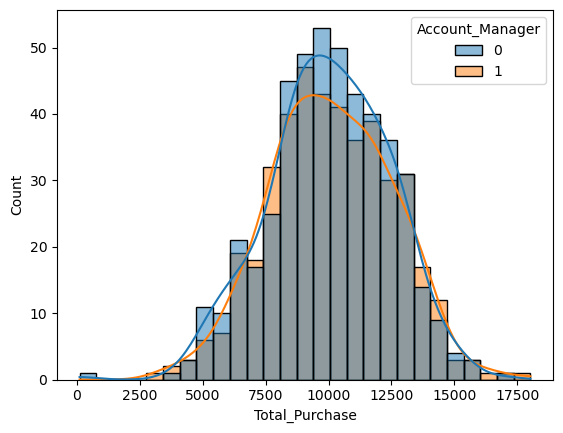

In [45]:
import seaborn as sns

# Plot histogram with seaborn
sns.histplot(data=data, x="Total_Purchase", hue="Account_Manager", kde=True)

## 8. Findings:

#### Based on the 5% significance level, there is sufficient evidence to suggest that the mean total purchase amount for clients without an account manager is higher than that for clients with an account manager.

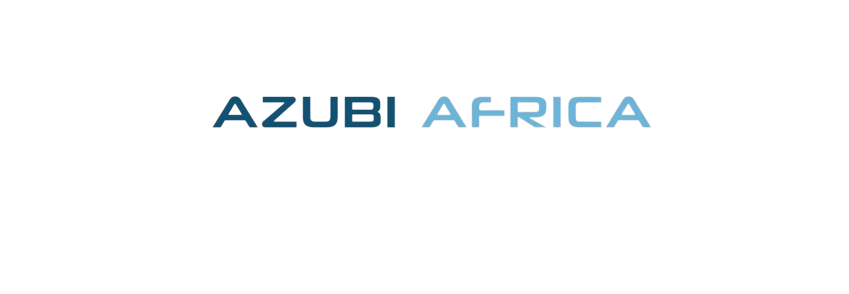